[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Vector representation for 'machine':
[-8.6224293e-03  3.6675797e-03  5.1908065e-03  5.7439026e-03
  7.4644121e-03 -6.1697145e-03  1.1036739e-03  6.0490393e-03
 -2.8420100e-03 -6.1708731e-03 -4.1218873e-04 -8.3718849e-03
 -5.6020506e-03  7.1065398e-03  3.3496208e-03  7.2237961e-03
  6.7977002e-03  7.5333291e-03 -3.7886575e-03 -5.6134467e-04
  2.3463478e-03 -4.5169177e-03  8.3861910e-03 -9.8587172e-03
  6.7618922e-03  2.9137367e-03 -4.9336175e-03  4.4004405e-03
 -1.7394110e-03  6.7085149e-03  9.9635469e-03 -4.3649483e-03
 -5.9875404e-04 -5.6925626e-03  3.8488719e-03  2.7900166e-03
  6.8949643e-03  6.0983058e-03  9.5358295e-03  9.2764525e-03
  7.9012793e-03 -6.9917873e-03 -9.1579948e-03 -3.5330222e-04
 -3.0983808e-03  7.8965267e-03  5.9360913e-03 -1.5491232e-03
  1.5117461e-03  1.7861603e-03  7.8160455e-03 -9.5115369e-03
 -2.0197946e-04  3.4726325e-03 -9.4009610e-04  8.3841179e-03
  9.0141613e-03  6.5355897e-03 -7.0851721e-04  7.7129793e-03
 -8.5327290e-03  3.2055755e-03 -4.6394086e-03 -5

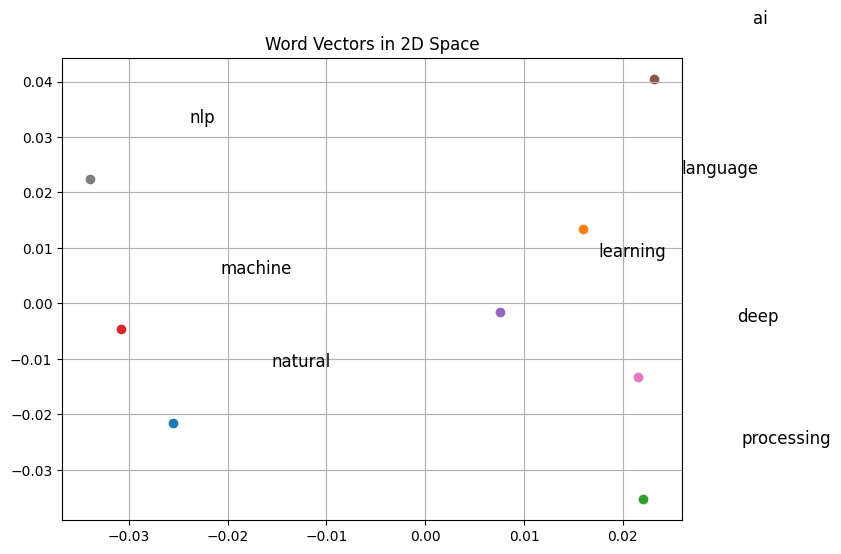

In [3]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import numpy as np
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

sentences = [
    "Natural language processing is fun",
    "I love machine learning",
    "Deep learning is a subset of machine learning",
    "NLP involves processing and analyzing text",
    "Word vectors capture semantic meaning",
    "Machine learning and AI are closely related fields"
]

tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

word = 'machine'
vector = model.wv[word]
print(f"Vector representation for '{word}':\n{vector}")

similar_words = model.wv.most_similar('machine', topn=5)
print(f"\nWords most similar to 'machine':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity:.4f}")

def plot_word_vectors(model, words):
    word_vectors = np.array([model.wv[word] for word in words])
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    plt.figure(figsize=(8, 6))
    for i, word in enumerate(words):
        plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
        plt.text(word_vectors_2d[i, 0] + 0.01, word_vectors_2d[i, 1] + 0.01, word, fontsize=12)

    plt.title('Word Vectors in 2D Space')
    plt.grid()
    plt.show()

words_to_visualize = ['natural', 'language', 'processing', 'machine', 'learning', 'ai', 'deep', 'nlp']
plot_word_vectors(model, words_to_visualize)